In [9]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from loading_data import load_data_from_postgres

query = "SELECT * FROM xdr_data"
df = load_data_from_postgres(query)

if df is not None:
    df=df.dropna()
    print("Successfuly loaded the data")
    print(df.head())
else:
    print("Failed to load the data")
    

c:\Users\HP\Desktop\tenx_w2\kaim-week-2\scripts\loading_data.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfuly loaded the data
       Bearer Id            Start  Start ms              End  End ms  \
11  1.311448e+19  4/15/2019 11:33     626.0  4/25/2019 18:44   542.0   
20  1.304243e+19   4/17/2019 0:35     363.0   4/25/2019 4:52   691.0   
68  1.304243e+19  4/21/2019 10:09       1.0   4/25/2019 1:39   272.0   
78  1.304243e+19  4/21/2019 19:35     344.0   4/25/2019 2:59   259.0   
84  1.304243e+19   4/22/2019 1:17     301.0   4/25/2019 1:17   938.0   

    Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
11   889834.0  2.082019e+14   3.366447e+10  8.600910e+13            T21335C   
20   706649.0  2.082010e+14   3.365875e+10  8.654080e+13            T29714B   
68   314961.0  2.082014e+14   3.366274e+10  3.528141e+13            T72937C   
78   285833.0  2.082018e+14   3.366917e+10  3.566261e+13            L41432B   
84   259201.0  2.082014e+14   3.366555e+10  8.637690e+13            T85779A   

    ...  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Byt

In [11]:
# Step 1: Check the general information of the dataset (data types, non-null counts, etc.)
# df = preprocess_data(df, missing_value_strategy='mean', z_threshold=3)
print(df.info())  # Shows the data types and number of non-null entries in each column

# Step 2: Get summary statistics for numerical columns
print(df.describe())  # Provides statistical summary for numerical columns, like mean, median, std deviation, etc.

# Step 3: Identify missing values by checking each column
missing_data = df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158022 entries, 11 to 1349998
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 158022 non-null  float64
 1   Start                                     158022 non-null  object 
 2   Start ms                                  158022 non-null  float64
 3   End                                       158022 non-null  object 
 4   End ms                                    158022 non-null  float64
 5   Dur. (ms)                                 158022 non-null  float64
 6   IMSI                                      158022 non-null  float64
 7   MSISDN/Number                             158022 non-null  float64
 8   IMEI                                      158022 non-null  float64
 9   Last Location Name                        158022 non-null  object 
 10  Avg RTT DL (ms)   

In [12]:
#  Perform the aggregation
from loading_data import aggregate_xdr_data
aggregated_data = aggregate_xdr_data()

# Check if the aggregation is successful
if aggregated_data is not None:
    print("Successfully aggregated the data")
    print(aggregated_data.head())  # Optionally, print the first few rows to verify
    # df_dec=segment_into_deciles(aggregated_data)
    # print(df_dec)
else:
    print("Failed to aggregate the data")
    
    

c:\Users\HP\Desktop\tenx_w2\kaim-week-2\scripts\loading_data.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully aggregated the data
        user_id  number_of_sessions  total_session_duration  \
0  2.040471e+14                   9               7828596.0   
1  2.040808e+14                   9               7896465.0   
2  2.082001e+14                   9                774171.0   
3  2.082001e+14                   9                776286.0   
4  2.082001e+14                  18               5165307.0   

   total_download_data  total_upload_data  total_data_volume  
0         7.082784e+08        544104441.0       1.252383e+09  
1         1.753453e+09        335663235.0       2.089116e+09  
2         2.823928e+08        484151922.0       7.665448e+08  
3         3.536265e+09        302249448.0       3.838514e+09  
4         8.655903e+09        641925036.0       9.297828e+09  


Basic Metrics:
                                mean           50%           std    skewness  \
total_session_duration  1.316555e+06  9.220545e+05  1.966452e+06   59.318379   
total_download_data     5.721931e+09  5.130566e+09  8.215303e+09  209.274787   
total_upload_data       5.175324e+08  4.210262e+08  7.197983e+08  235.216745   
total_data_volume       6.239463e+09  5.558683e+09  8.892193e+09  214.356921   

                            kurtosis  
total_session_duration   8621.707973  
total_download_data     58928.904540  
total_upload_data       68888.823352  
total_data_volume       60849.027231  


Non-Graphical Univariate Analysis Results:
                                mean           std        skew          kurt
total_session_duration  1.316555e+06  1.966452e+06   59.318379   8621.707973
total_download_data     5.721931e+09  8.215303e+09  209.274787  58928.904540
total_upload_data       5.175324e+08  7.197983e+08  235.216745  68888.823352
total_data_volume       6.239463e+09

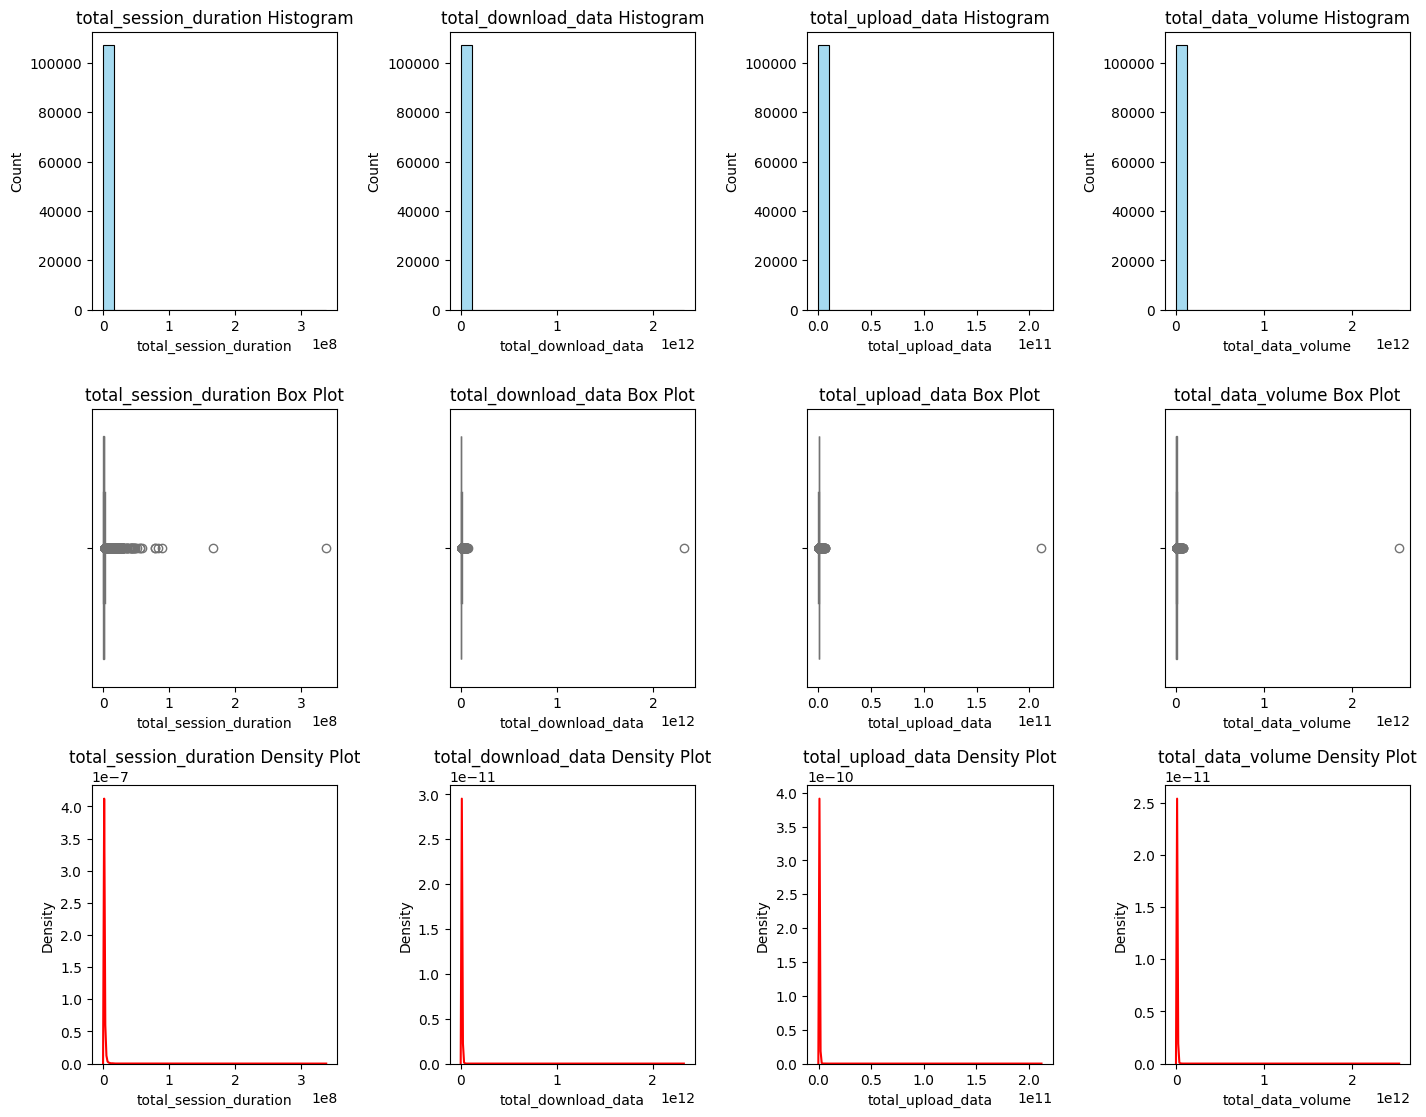

In [13]:
from analysis_eda import basic_metrics,non_graphical_univariate_analysis,graphical_univariate_analysis
numerical_columns = ['total_session_duration', 'total_download_data', 'total_upload_data', 'total_data_volume']
basic_metrics(aggregated_data,numerical_columns)

dispersion_params = non_graphical_univariate_analysis(aggregated_data, numerical_columns)
print("Non-Graphical Univariate Analysis Results:")
print(dispersion_params)
graphical_univariate_analysis(aggregated_data, numerical_columns)

In [14]:
from data_transform import segment_into_deciles
segment_into_deciles(aggregated_data)

,Decile,total_session_duration,total_download_data,total_upload_data,total_data_volume
0,1,1.931468e+09,4.506420e+13,4.056757e+12,4.912096e+13
1,2,3.854862e+09,5.040630e+13,4.553685e+12,5.495999e+13
2,3,6.809262e+09,5.406827e+13,4.905610e+12,5.897388e+13
3,4,9.604721e+09,5.099069e+13,4.608880e+12,5.559957e+13
4,5,7.705691e+09,4.184449e+13,3.788937e+12,4.563343e+13
5,6,1.130389e+10,5.325289e+13,4.819625e+12,5.807252e+13
6,7,1.423947e+10,5.101788e+13,4.567194e+12,5.558507e+13
7,8,1.687484e+10,6.471109e+13,5.887173e+12,7.059827e+13
8,9,2.243567e+10,7.702257e+13,6.954322e+12,8.397689e+13
9,10,4.646168e+10,1.253902e+14,1.137145e+13,1.367617e+14


KeyError: 'Social Media Total (Bytes)'

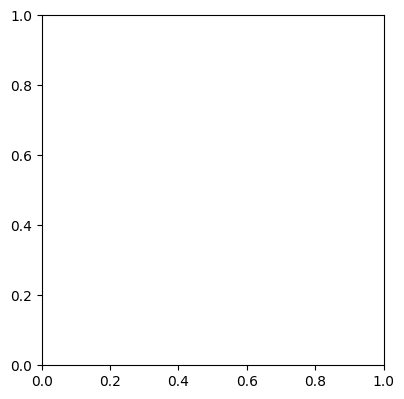

In [15]:
from corr_bi import bivariate_and_correlation
bivariate_and_correlation(df,aggregated_data)

In [ ]:
from pca_analysis import perform_pca
print(df.isnull().sum())

# Drop rows with NaN values
df_cleaned = df.dropna()

# Alternatively, you could fill NaN values with the mean (or another strategy)
# df_cleaned = df.fillna(df.mean())

# Check again if there are any remaining NaN values
print(df_cleaned.isnull().sum())

# Now you can perform PCA
perform_pca(df_cleaned, aggregated_data)
# perform_pca(df,aggregated_data)

In [16]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from adv_analysis import adv_analysis
adv_anlysis(df)

Top 10 Handsets:
Huawei B528S-23A                79551
Huawei E5180                     7173
Apple iPhone 7 (A1778)           4707
Apple iPhone Xr (A2105)          4617
Apple iPhone 6S (A1688)          4563
Apple iPhone 6 (A1586)           4527
undefined                        4059
Apple iPhone X (A1901)           3861
Apple iPhone 8 (A1905)           3852
Samsung Galaxy S8 (Sm-G950F)     3483
Name: Handset Type, dtype: int64

Top 3 Handset Manufacturers:
Huawei     93906
Apple      39258
Samsung    17856
Name: Handset Manufacturer, dtype: int64

Top 5 Handsets Per Manufacturer:

Huawei:
Huawei B528S-23A                  79551
Huawei E5180                       7173
Huawei P20                          873
Huawei P20 Pro                      846
Huawei P20 Lite Huawei Nova 3E      738
Name: Handset Type, dtype: int64

Apple:
Apple iPhone 7 (A1778)     4707
Apple iPhone Xr (A2105)    4617
Apple iPhone 6S (A1688)    4563
Apple iPhone 6 (A1586)     4527
Apple iPhone X (A1901)     3861
Name